# Hotte (2001) Property Rights on the Frontier

This is a simplified version of the model by Hotte(2001, 2013) 

```
Hotte, Louis. 2001. “Conflicts over Property Rights and Natural-Resource Exploitation at the Frontier.” Journal of Development Economics 66 (1): 1–21.  

Hotte, Louis. 2013. “Environmental Conflict and Natural Resources.” Reference Module in Earth Systems and Environmental Sciences from Encyclopedia of Energy, Natural Resource, and Environmental Economics, no. 3: 261–270.

```


Player A (first-mover, incumbent) and Player B (challenger) make defensive and incursive investments, respectively.

*Contest  success function (CSF)*
$$\pi(x_A, x_B) = \frac{x_A}{x_A+x_B}$$

Sustainable use 

$$V_A^s=p \cdot y_s +\pi(x_A, x_B)\frac{p \cdot y_s}{1+r}-x_A$$

$$V_B^s= (1-\pi(x_A, x_B))\frac{p \cdot y_s}{1+r}-x_B$$

But player $A$ can alos opt to *mine* the land, in which case payoffs are:

$$V_A^m=p \cdot y_m$$

$$V_B^m= 0$$

where $y_m>y_s$

Reaction function: 

$$\frac{\delta V_A^s}{\delta x_A}=\frac{\delta \pi(x_A,x_B)}{\delta x_A}\frac{p\cdot y_s}{1+r}-1=0$$

$$\frac{x_B}{(x_A+x_B)^2}\frac{p\cdot y_s}{1+r}=1$$

$$x_A(x_B) = \sqrt{\frac{x_B \cdot p y_s}{1+r}} -x_B$$

## Code section

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
%matplotlib inline

In [91]:
P = 1.0
YS = 130
YM = 150
R  = 0.0

In [92]:
def xa_r(xb, p=P, ys=YS, r = R):
    return (xb*p*ys/(1+r))**(1/2) - xb

def xb_r(xa, p=P, ys=YS, r = R):
    return (xa*p*ys/(1+r))**(1/2) - xa

def xnash(p=P, ys=YS, r=R):
    return p*ys/(4*(1+r))

def pr(xa,xb):
    return xa/(xa+xb)

def vA(p=P, ys=YS, ym=YM, r=R):
    xn = xnash(p,ys,r)
    return p*ys +  pr(xn,xn) *p*ys/(1+r) - xnash(p,ys,r), p*ym, 2*xn

In [93]:
xxb = np.linspace(0,50,100)

In [94]:
def contest_plot(p=P, ys=YS, r = R):
    plt.grid()
    plt.scatter(xnash(p,ys,r), xnash(p,ys,r))
    plt.plot(xxb,xa_r(xxb, p, ys, r))
    plt.plot(xb_r(xxb, p, ys, r), xxb)
    plt.show()

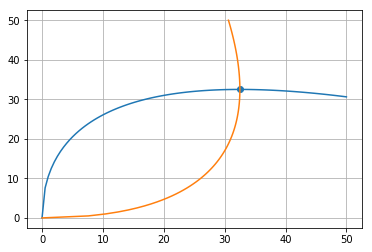

In [95]:
contest_plot()

In [96]:
interact(contest_plot);

A Jupyter Widget

In [97]:
interact(vA);

A Jupyter Widget

## Choice to mine or exploit with conflict.

If 'mine' conflict is avoided but 'shadow of conflict' is what drove them toward mining.

The following are just exploratorty notes..

In [98]:
def priceboom(p=P, ys=YS, ym=YM, r=R):
    xn = xnash(p,ys,r)
    q = pr(xn,xn)
    VA = p*ys +  q*p*ys/(1+r) - xn
    VB =(1-q)*p*ys/(1+r) - xn
    VAB = VA + VB
    VM = p*ym
    #plt.plot(p, VA)
    #plt.plot(p,VB)
    plt.plot(p,VAB)
    plt.plot(p,VM, linestyle='--')
    plt.plot(p,p*ys+p*ys/(1+r))
    plt.show()
    

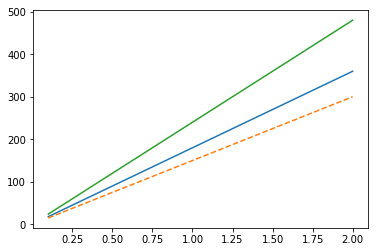

In [99]:
pp = np.linspace(0.1, 2,20)
priceboom(pp, ys=120, ym=150)